In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('/content/portugal-housing-sample.csv')

In [44]:
df.head()

,Price,District,City,Town,Type,EnergyCertificate,Floor,Lift,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,55000.0,Coimbra,Figueira da Foz,Alqueidão,Land,NC,NaN,False,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1287.0,NaN,NaN,0.0
1,289000.0,Setúbal,Montijo,Canha,House,D,NaN,False,2.0,True,...,NaN,NaN,4.0,NaN,NaN,NaN,156.0,NaN,NaN,4.0
2,46500.0,Lisboa,Lourinhã,Lourinhã e Atalaia,Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,2880.0,NaN,0.0
3,203000.0,Porto,Vila Nova de Gaia,Vilar de Andorinho,Apartment,E,3rd Floor,True,1.0,True,...,NaN,NaN,2.0,NaN,NaN,NaN,92.0,NaN,NaN,2.0
4,72500.0,Braga,Cabeceiras de Basto,"Refojos de Basto, Outeiro e Painzela",Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,1954.0,NaN,0.0


In [45]:
df.shape

(20000, 25)

In [46]:
df.drop(columns=['NumberOfBedrooms', 'NumberOfWC', 'NumberOfBathrooms'], inplace=True)

In [47]:
df.columns

Index(['Price', 'District', 'City', 'Town', 'Type', 'EnergyCertificate',
       'Floor', 'Lift', 'Parking', 'HasParking', 'ConstructionYear',
       'TotalArea', 'GrossArea', 'PublishDate', 'Garage', 'Elevator',
       'ElectricCarsCharging', 'TotalRooms', 'ConservationStatus',
       'LivingArea', 'LotSize', 'BuiltArea'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 20000 non-null  float64
 1   District              20000 non-null  object 
 2   City                  20000 non-null  object 
 3   Town                  19999 non-null  object 
 4   Type                  20000 non-null  object 
 5   EnergyCertificate     20000 non-null  object 
 6   Floor                 4925 non-null   object 
 7   Lift                  11874 non-null  object 
 8   Parking               19967 non-null  float64
 9   HasParking            11874 non-null  object 
 10  ConstructionYear      12965 non-null  float64
 11  TotalArea             18941 non-null  float64
 12  GrossArea             4790 non-null   float64
 13  PublishDate           2668 non-null   object 
 14  Garage                8123 non-null   object 
 15  Elevator           

In [49]:
df.nunique()

,0
Price,2130
District,24
City,264
Town,1869
Type,21
EnergyCertificate,11
Floor,18
Lift,2
Parking,4
HasParking,2


In [50]:
df.isna().sum()

,0
Price,0
District,0
City,0
Town,1
Type,0
EnergyCertificate,0
Floor,15075
Lift,8126
Parking,33
HasParking,8126


In [51]:
#mencari mean dari data setiap data yang kosong

df_copy = df.copy(deep=True)
mean_parking = df_copy['Parking'].mean()
mean_constructionyear = df_copy['ConstructionYear'].mean()
mean_totalarea = df_copy['TotalArea'].mean()
mean_grossarea = df_copy['GrossArea'].mean()
mean_totalrooms = df_copy['TotalRooms'].mean()
mean_livingarea = df_copy['LivingArea'].mean()
mean_lotsize = df_copy['LotSize'].mean()
mean_builtarea = df_copy['BuiltArea'].mean()

In [52]:
print(f"Mean of Parking: {mean_parking}")
print(f"Mean of ConstructionYear: {mean_constructionyear}")
print(f"Mean of TotalArea: {mean_totalarea}")
print(f"Mean of GrossArea: {mean_grossarea}")
print(f"Mean of TotalRooms: {mean_totalrooms}")
print(f"Mean of LivingArea: {mean_livingarea}")
print(f"Mean of LotSize: {mean_lotsize}")
print(f"Mean of BuiltArea: {mean_builtarea}")

Mean of Parking: 0.5805078379325888
Mean of ConstructionYear: 1988.7430003856537
Mean of TotalArea: 21475.36956866058
Mean of GrossArea: 2112.3146137787057
Mean of TotalRooms: 3.2917978314095837
Mean of LivingArea: 2000.3846505551926
Mean of LotSize: 15299.29628164557
Mean of BuiltArea: 7416.584757891511


In [53]:
#mengisi data yang kosong dengan nilai mean masing masing data

df_copy.fillna({
    'Parking': mean_parking,
    'ConstructionYear': mean_constructionyear,
    'TotalArea': mean_totalarea,
    'GrossArea': mean_grossarea,
    'TotalRooms': mean_totalrooms,
    'LivingArea': mean_livingarea,
    'LotSize': mean_lotsize,
    'BuiltArea': mean_builtarea,
}, inplace=True)

In [54]:
df_copy.isna().sum()

,0
Price,0
District,0
City,0
Town,1
Type,0
EnergyCertificate,0
Floor,15075
Lift,8126
Parking,0
HasParking,8126


In [55]:
# mengisi data kosong dengan algoritma K-Nearest Neighbors
from sklearn.impute import KNNImputer

null_column = ['Parking', 'ConstructionYear', 'TotalArea', 'GrossArea', 'TotalRooms',
               'LivingArea', 'LotSize', 'BuiltArea']

imputer = KNNImputer(n_neighbors=5)
df[null_column] = imputer.fit_transform(df[null_column])

In [60]:
#mengecek kolom dengan tipe data numerik

df_numerik = df.select_dtypes(include=['float'])
df_numerik.columns

Index(['Price', 'Parking', 'ConstructionYear', 'TotalArea', 'GrossArea',
       'TotalRooms', 'LivingArea', 'LotSize', 'BuiltArea'],
      dtype='object')

In [57]:
#mengecek kolom dengan tipe data karakter

df_karakter = df.select_dtypes(include=['object'])
df_karakter.columns

Index(['District', 'City', 'Town', 'Type', 'EnergyCertificate', 'Floor',
       'Lift', 'HasParking', 'PublishDate', 'Garage', 'Elevator',
       'ElectricCarsCharging', 'ConservationStatus'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['District'] = encoder.fit_transform(df['District'])
df['City'] = encoder.fit_transform(df['City'])
df['Town'] = encoder.fit_transform(df['Town'])
df['Type'] = encoder.fit_transform(df['LivingArea'])
df['EnergyCertificate'] = encoder.fit_transform(df['LotSize'])
df['Floor'] = encoder.fit_transform(df['Floor'])
df['Lift'] = encoder.fit_transform(df['Lift'])
df['HasParking'] = encoder.fit_transform(df['HasParking'])
df['PublishDate'] = encoder.fit_transform(df['PublishDate'])
df['Garage'] = encoder.fit_transform(df['Garage'])
df['Elevator'] = encoder.fit_transform(df['Elevator'])
df['ElectricCarsCharging'] = encoder.fit_transform(df['ElectricCarsCharging'])
df['ConservationStatus'] = encoder.fit_transform(df['ConservationStatus'])

In [62]:
df.head()

,Price,District,City,Town,Type,EnergyCertificate,Floor,Lift,Parking,HasParking,...,GrossArea,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,ConservationStatus,LivingArea,LotSize,BuiltArea
0,55000.0,5,89,106,1625,1390,18,0,0.0,0,...,1083.0,2656,2,2,2,0.8,6,1287.0,2152.6,1538.200
1,289000.0,18,139,393,329,2280,18,0,2.0,1,...,306.0,2656,2,2,2,4.0,6,156.0,4213.6,313.160
2,46500.0,14,113,859,221,1705,18,2,0.0,2,...,1316.2,2656,0,0,0,2.4,6,112.0,2880.0,255.764
3,203000.0,16,245,1825,178,3310,2,1,1.0,1,...,109.0,2656,2,2,2,2.0,6,92.0,11336.2,410.760
4,72500.0,2,52,1287,1404,1316,18,2,0.0,2,...,369.4,2656,0,0,0,1.2,6,949.6,1954.0,1977.200


In [63]:
df.describe()

,Price,District,City,Town,Type,EnergyCertificate,Floor,Lift,Parking,HasParking,...,GrossArea,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,ConservationStatus,LivingArea,LotSize,BuiltArea
count,2.000000e+04,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04
mean,3.604319e+05,11.537400,133.462000,897.60720,751.63685,2227.060650,14.867450,0.963200,0.579847,1.080600,...,1.900747e+03,2478.661650,1.259550,1.279700,1.226100,2.402084,5.548750,2.995933e+03,1.305279e+04,3.291238e+03
std,6.820353e+05,6.298014,73.563314,537.66063,974.32091,1245.104021,6.172616,0.920917,0.882051,0.851786,...,3.102218e+04,531.574732,0.927808,0.910939,0.954214,19.559091,1.370116,5.062224e+04,9.297274e+04,9.328172e+04
min,1.000000e+02,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.950000e+04,5.000000,73.000000,418.00000,171.00000,1292.000000,18.000000,0.000000,0.000000,0.000000,...,1.140000e+02,2656.000000,0.000000,0.000000,0.000000,0.800000,6.000000,9.000000e+01,1.882600e+03,2.679950e+02
50%,2.000000e+05,14.000000,120.000000,902.00000,300.00000,1934.000000,18.000000,1.000000,0.000000,1.000000,...,2.032000e+02,2656.000000,2.000000,2.000000,2.000000,2.000000,6.000000,1.430000e+02,3.389000e+03,7.076387e+02
75%,3.900000e+05,16.000000,204.000000,1370.25000,782.00000,3388.000000,18.000000,2.000000,1.000000,2.000000,...,4.630000e+02,2656.000000,2.000000,2.000000,2.000000,3.000000,6.000000,3.900000e+02,1.167680e+04,2.524050e+03
max,3.600000e+07,23.000000,263.000000,1869.00000,3996.00000,4264.000000,18.000000,2.000000,3.000000,2.000000,...,3.770000e+06,2656.000000,2.000000,2.000000,2.000000,2751.000000,6.000000,5.429000e+06,5.912500e+06,1.265000e+07


In [64]:
#import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

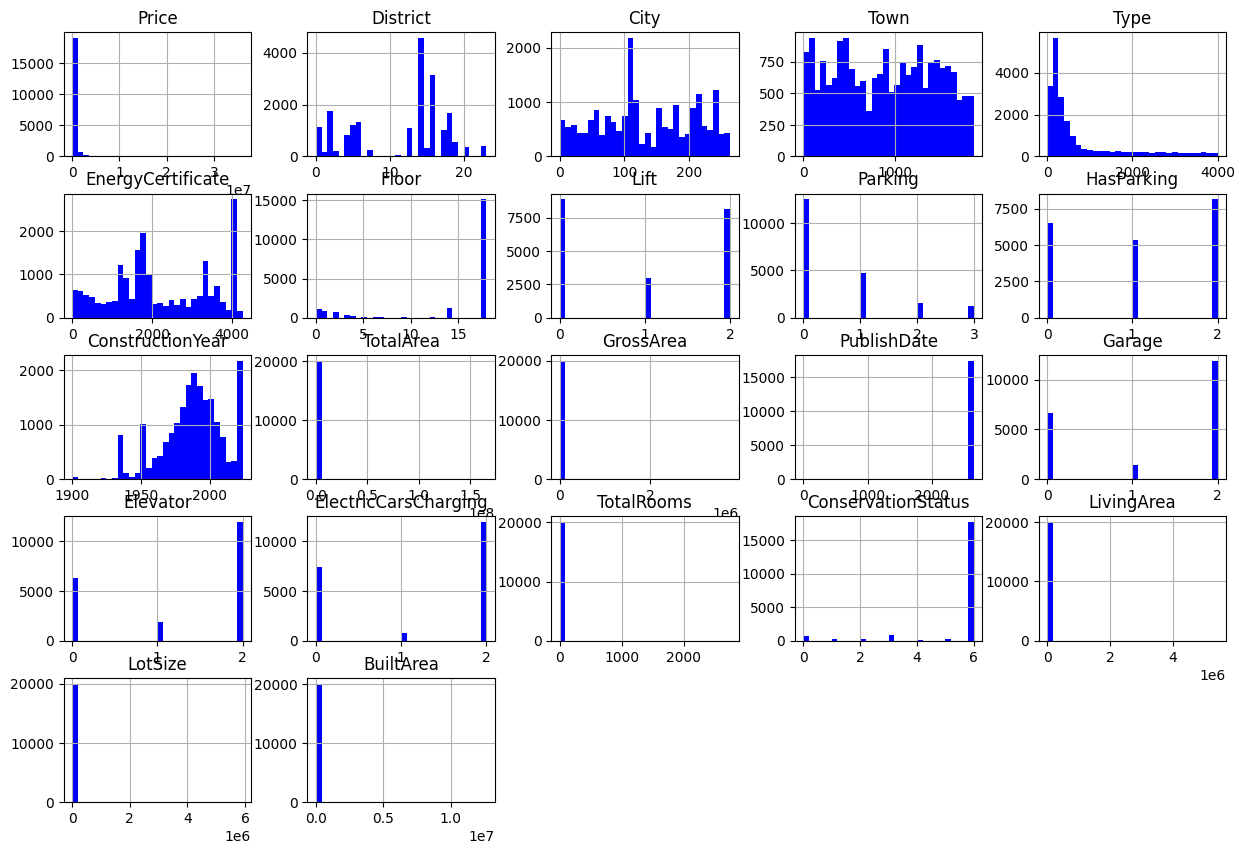

In [65]:
#visualisasi menggunakan histogram untuk melihat distribusi data

df.hist(figsize=(15, 10), bins=30, color='blue');

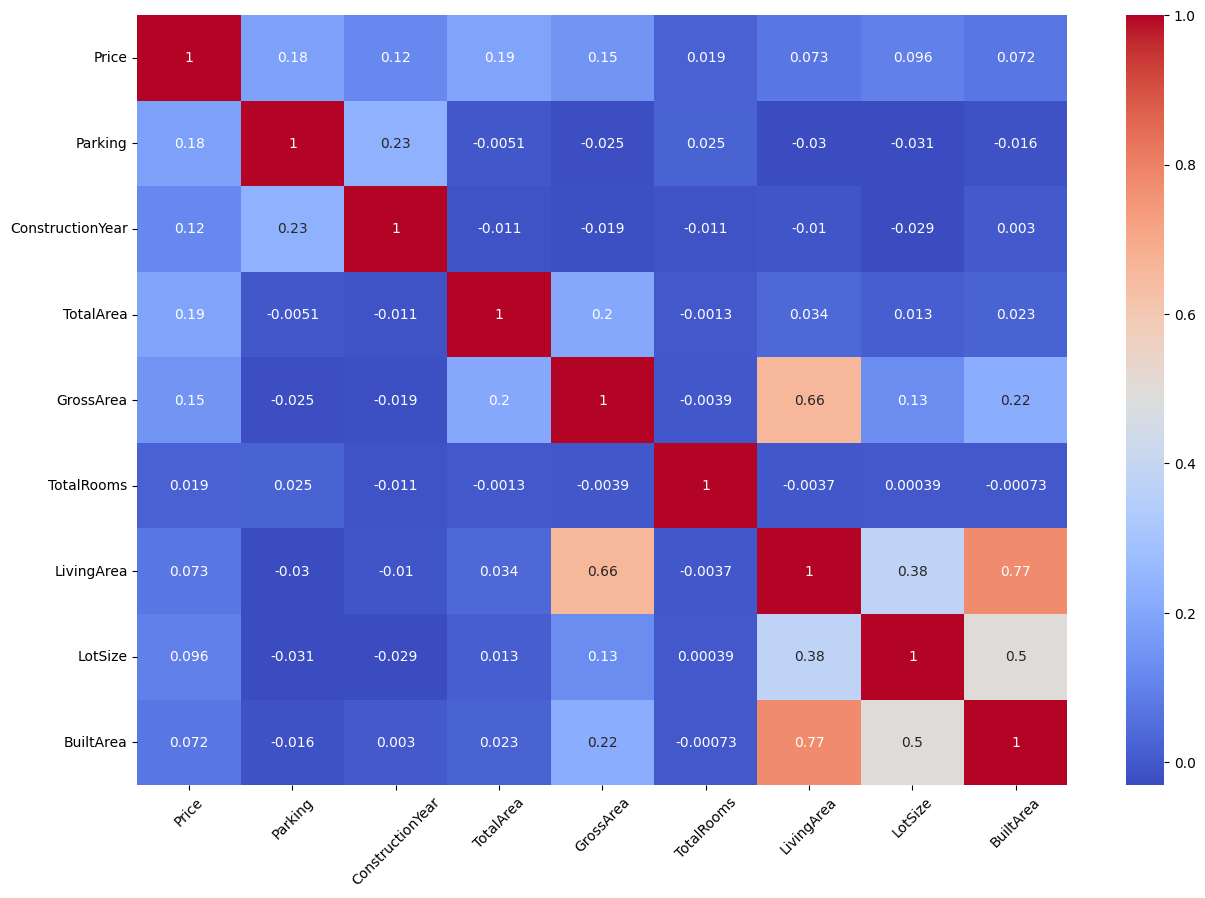

In [66]:
#visualisasi menggunakan headmap untuk melihat korelasi antar variabel

plt.figure(figsize=(15, 10))
sns.heatmap(df_numerik.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

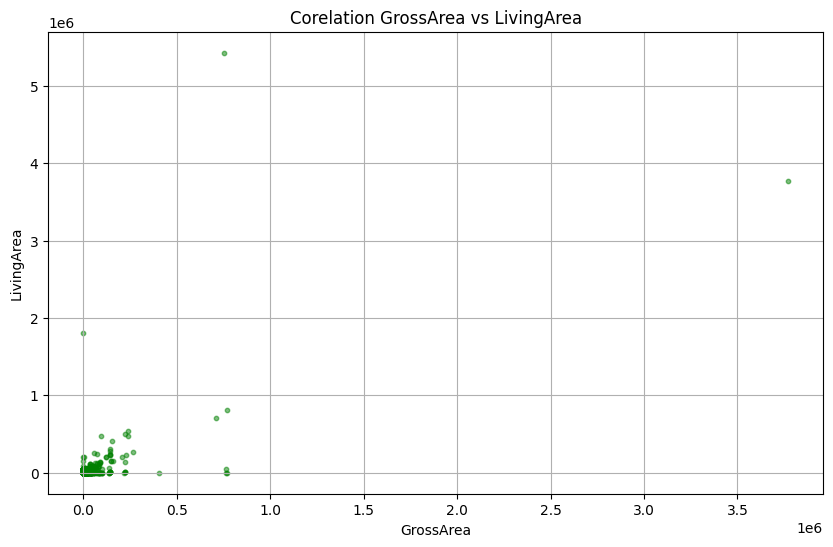

In [67]:
#visualisasi korelasi positif menggunakan scatterplot

plt.figure(figsize=(10, 6))
plt.scatter(x=df['GrossArea'], y=df['LivingArea'], color='green', alpha=0.5, s=10)
plt.title('Corelation GrossArea vs LivingArea')
plt.xlabel('GrossArea')
plt.ylabel('LivingArea')
plt.grid(True)
plt.show()

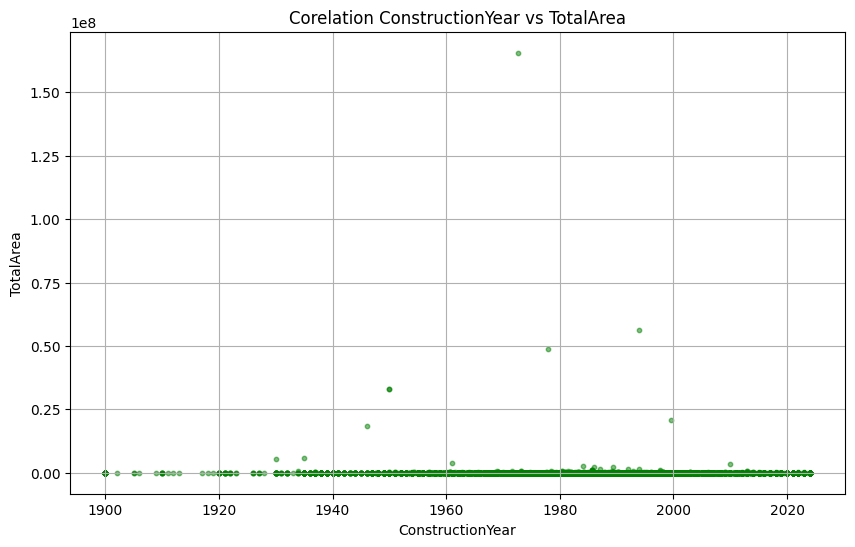

In [75]:
#visualisasi korelasi negatif menggunakan scatterplot

plt.figure(figsize=(10, 6))
plt.scatter(x=df['ConstructionYear'], y=df['TotalArea'], color='green', alpha=0.5, s=10)
plt.title('Corelation ConstructionYear vs TotalArea')
plt.xlabel('ConstructionYear')
plt.ylabel('TotalArea')
plt.grid(True)
plt.show()

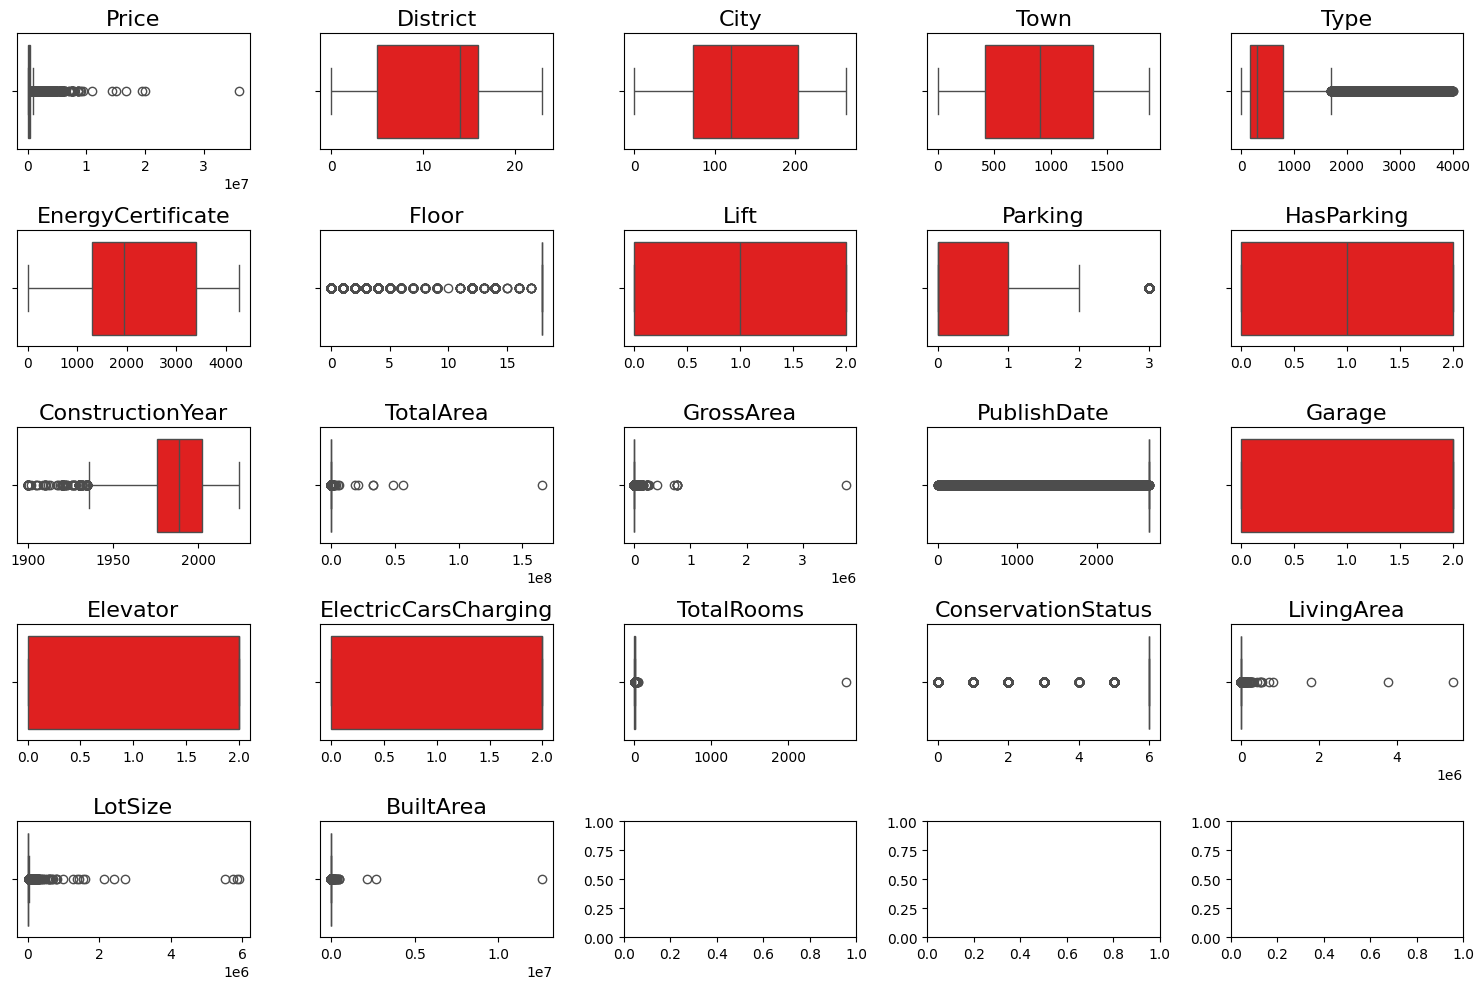

In [76]:
# visualisasi menggunakan boxplot untuk melihat data outliers
fig, ax = plt.subplots(5, 5, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=df[col], color='red', ax=ax[i])
    ax[i].set_title(col, fontsize=16)
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

# Outliers Handling

In [77]:
# Menangani data outlier dengan mengubah nilai outlier ke nilai kuartil terdekat(Kuartil 1 dan Kuartil 3).

def iqr_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[col] = df[col].mask(df[col] < lower_bound, Q1)
    df[col] = df[col].mask(df[col] > upper_bound, Q3)
    return df

for col in df.columns:
    iqr_outliers(df, col)

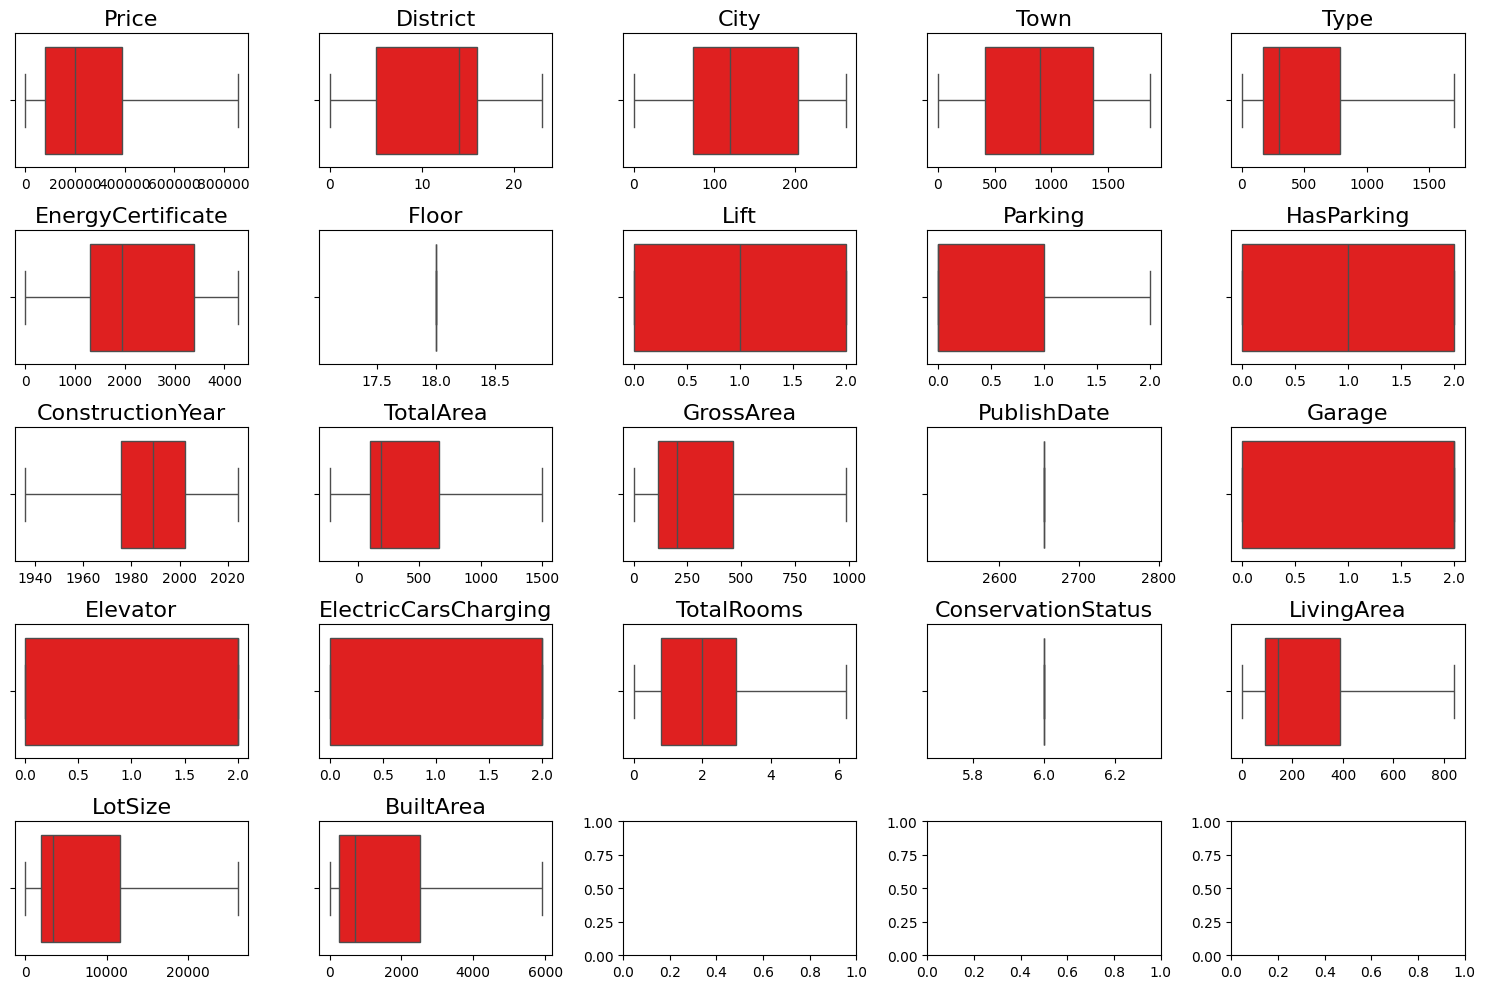

In [78]:
fig, ax = plt.subplots(5, 5, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=df[col], color='red', ax=ax[i])
    ax[i].set_title(col, fontsize=16)
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

# Normalization & Scalling Data

In [79]:
# membagi data fitur dan data target
x = df.drop('Price', axis=1)
y = df['Price']

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [81]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [82]:
x_scaled.head()

,District,City,Town,Type,EnergyCertificate,Floor,Lift,Parking,HasParking,ConstructionYear,...,GrossArea,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,ConservationStatus,LivingArea,LotSize,BuiltArea
0,0.217391,0.338403,0.056715,0.957008,0.325985,0.0,0.0,0.0,0.0,0.490909,...,0.469479,0.0,1.0,1.0,1.0,0.129032,0.0,0.464286,0.082286,0.260500
1,0.782609,0.528517,0.210273,0.193757,0.534709,0.0,0.0,1.0,0.5,0.568182,...,0.310282,0.0,1.0,1.0,1.0,0.645161,0.0,0.185714,0.161070,0.053035
2,0.608696,0.429658,0.459604,0.130153,0.399859,0.0,1.0,0.0,1.0,0.286364,...,0.469479,0.0,0.0,0.0,0.0,0.387097,0.0,0.133333,0.110092,0.043315
3,0.695652,0.931559,0.976458,0.104829,0.776266,0.0,0.5,0.5,0.5,0.681818,...,0.110525,0.0,1.0,1.0,1.0,0.322581,0.0,0.109524,0.433341,0.069564
4,0.086957,0.197719,0.688604,0.826855,0.308630,0.0,1.0,0.0,1.0,0.536364,...,0.374569,0.0,0.0,0.0,0.0,0.193548,0.0,0.464286,0.074694,0.334846


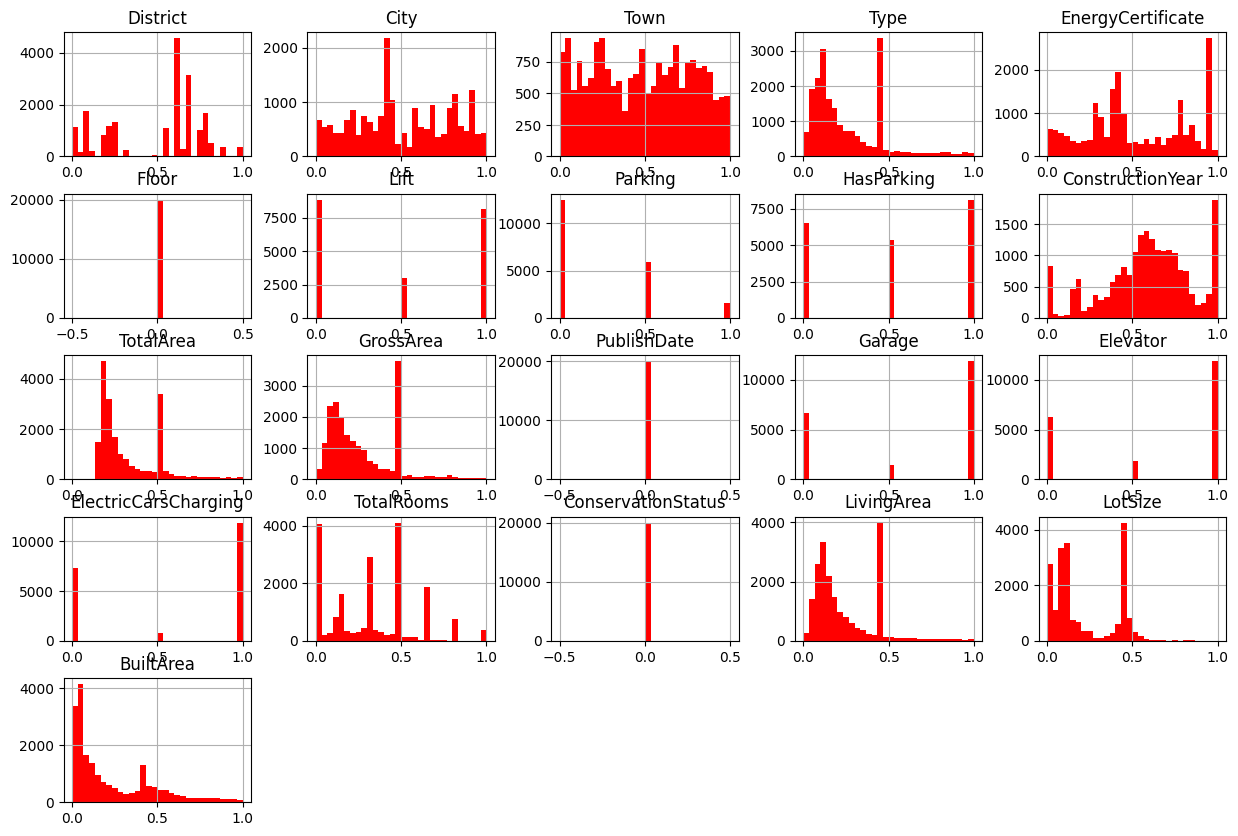

In [83]:
x_scaled.hist(figsize=(15, 10), bins=30,color='red');

# Modeling

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,
                                                    random_state=42)

In [85]:
# proporsi pembagian data training
print(x_train.shape)
print(x_train.shape[0]/len(df)*100, '%')

# proporsi pembagian data test
print(x_test.shape)
print(x_test.shape[0]/len(df)*100, '%')

(16000, 21)
80.0 %
(4000, 21)
20.0 %


In [86]:
x_train.head()

,District,City,Town,Type,EnergyCertificate,Floor,Lift,Parking,HasParking,ConstructionYear,...,GrossArea,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,ConservationStatus,LivingArea,LotSize,BuiltArea
5894,0.086957,0.186312,0.166934,0.106596,0.956848,0.0,0.5,0.0,0.0,0.806818,...,0.105252,0.0,1.0,1.0,1.0,0.483871,0.0,0.110714,0.446361,0.465621
3728,0.826087,0.878327,0.924559,0.460542,0.477486,0.0,0.0,0.0,0.0,0.438636,...,0.469479,0.0,1.0,1.0,1.0,0.000000,0.0,0.464286,0.138127,0.097683
8958,0.608696,0.809886,0.836811,0.460542,0.315666,0.0,0.0,0.0,0.0,0.647727,...,0.469479,0.0,1.0,1.0,1.0,0.000000,0.0,0.464286,0.078364,0.088450
7671,0.608696,0.418251,0.578919,0.111307,0.465056,0.0,1.0,0.0,1.0,0.988636,...,0.134253,0.0,0.5,0.5,0.0,0.129032,0.0,0.115476,0.133326,0.283938
5999,0.608696,0.855513,0.000000,0.408716,0.871248,0.0,0.0,0.5,0.5,0.806818,...,0.335429,0.0,1.0,1.0,1.0,0.967742,0.0,0.398810,0.520206,0.083959


In [87]:
y_train.head()

,Price
5894,425000.0
3728,90000.0
8958,20000.0
7671,520000.0
5999,675000.0


# Linear Regression

In [88]:
# import model
from sklearn.linear_model import LinearRegression

# inisiasi model linear regression
model_linear = LinearRegression()

# melatih model dengan data training
model_linear.fit(x_train, y_train)

# menguji model dengan memprediksi data test
y_pred_lr = model_linear.predict(x_test)

In [89]:
# nilai intercept(b) pada model
model_linear.intercept_

-265728.9549822907

In [90]:
# nilai slope(m) pada model
linear_coef = pd.DataFrame({'Columns':x.columns, 'Coefficient':model_linear.coef_})
linear_coef

,Columns,Coefficient
0,District,8.690787e+04
1,City,1.013144e+04
2,Town,-3.550017e+04
3,Type,8.028459e+03
4,EnergyCertificate,1.089151e+05
5,Floor,-2.910383e-11
6,Lift,1.769258e+05
7,Parking,9.611876e+04
8,HasParking,7.173070e+04
9,ConstructionYear,1.143085e+05


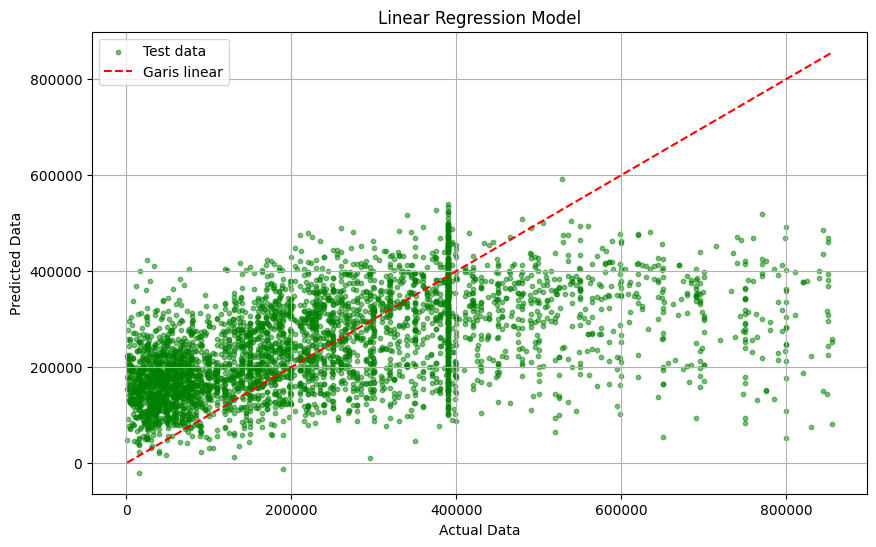

In [91]:
# visualisasi scatterplot untuk mengevaluasi kinerja model regresi dalam memprediksi data

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='green', label='Test data', alpha=0.5, s=10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Garis linear', linestyle= '--')
plt.title('Linear Regression Model')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# import library yang digunakan untuk evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae_linear = mean_absolute_error(y_test, y_pred_lr)
mse_linear = mean_squared_error(y_test, y_pred_lr)
rms_linear = root_mean_squared_error(y_test, y_pred_lr)
r2_linear = r2_score(y_test, y_pred_lr)

print('mean absolute error:', mae_linear)
print('mean squared error:', mse_linear)
print('root mean squared error:', rms_linear)
print('r2 score:', r2_linear)

mean absolute error: 121117.69475982776
mean squared error: 25448031917.349876
root mean squared error: 159524.39285999455
r2 score: 0.2795569628415051


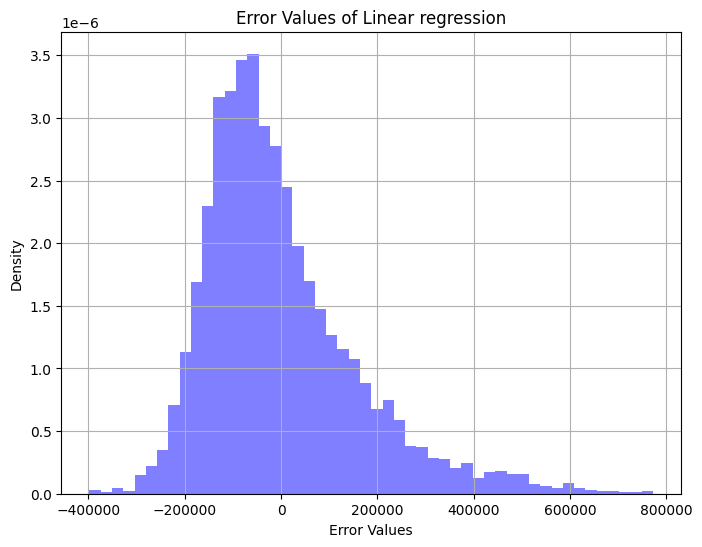

In [93]:
# visualisasi distribusi error antara nilai aktual dan prediksi model
error_values_lr = y_test - y_pred_lr

plt.figure(figsize=(8, 6))
plt.hist(error_values_lr, bins=50, density=True, color='blue', alpha=0.5)
plt.title('Error Values of Linear regression')
plt.xlabel('Error Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Ridge Regression

In [94]:
# import model
from sklearn.linear_model import Ridge

# inisialisasi model ridge regression
model_ridge = Ridge(alpha=0.5)

# melatih model dengan data training
model_ridge.fit(x_train, y_train)

# menguji model dengan memprediksi data test
y_pred_rd = model_ridge.predict(x_test)

In [95]:
# nilai intercept(b) pada model
model_ridge.intercept_

-265084.3072203675

In [96]:
# nilai slope(m) pada model
ridge_coef = pd.DataFrame({'Columns':x.columns, 'Coefficient':model_ridge.coef_})
ridge_coef

,Columns,Coefficient
0,District,86877.697928
1,City,10138.397928
2,Town,-35497.614860
3,Type,8490.674716
4,EnergyCertificate,107765.194679
5,Floor,0.000000
6,Lift,176683.790497
7,Parking,96086.584730
8,HasParking,71638.829575
9,ConstructionYear,114317.202417


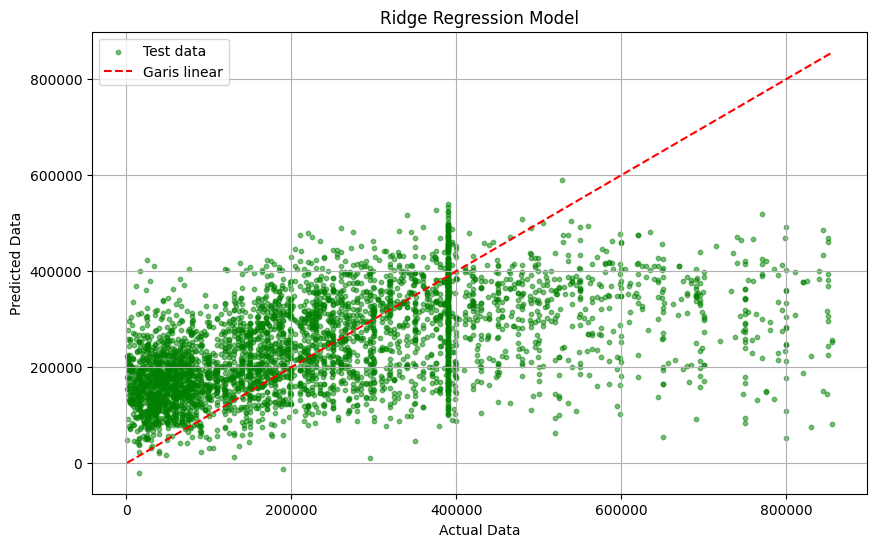

In [97]:
# visualisasi scatterplot untuk mengevaluasi kinerja model regresi dalam memprediksi data

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rd, color='green', label='Test data', alpha=0.5, s=10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Garis linear', linestyle= '--')
plt.title('Ridge Regression Model')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
# evaluasi model
mae_ridge = mean_absolute_error(y_test, y_pred_rd)
mse_ridge = mean_squared_error(y_test, y_pred_rd)
rms_ridge = root_mean_squared_error(y_test, y_pred_rd)
r2_ridge = r2_score(y_test, y_pred_rd)

print('mean absolute error:', mae_ridge)
print('mean squared error:', mse_ridge)
print('root mean squared error:', rms_ridge)
print('r2 score:', r2_ridge)

mean absolute error: 121121.37987751448
mean squared error: 25449079161.29449
root mean squared error: 159527.67522061648
r2 score: 0.27952731498462735


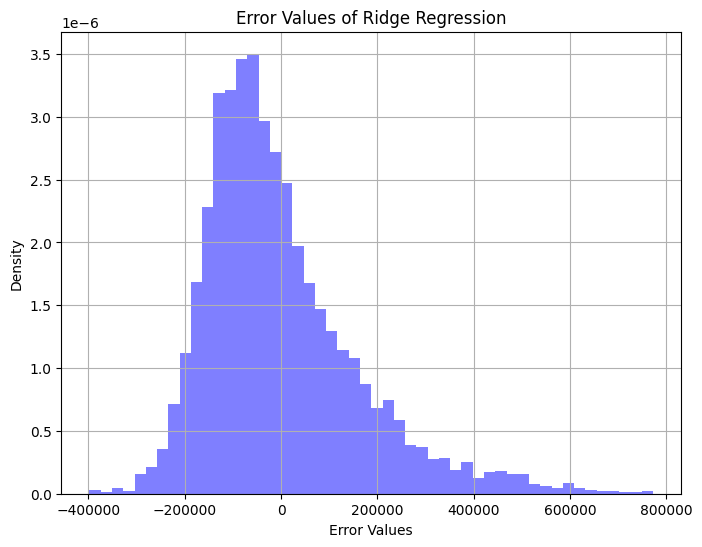

In [99]:
# visualisasi distribusi error antara nilai aktual dan prediksi model
error_values_rd = y_test - y_pred_rd

plt.figure(figsize=(8, 6))
plt.hist(error_values_rd, bins=50, density=True, color='blue', alpha=0.5)
plt.title('Error Values of Ridge Regression')
plt.xlabel('Error Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Lasso Regression

In [100]:
# import model
from sklearn.linear_model import Lasso

# inisialisasi model lasso regression
model_lasso = Lasso(alpha=0.5)

# melatih model dengan data training
model_lasso.fit(x_train, y_train)

# menguji model dengan memprediksi data test
y_pred_ls = model_lasso.predict(x_test)

In [101]:
# nilai intercept(b) pada model
model_lasso.intercept_

-265647.9365273758

In [102]:
# nilai slope(m) pada model
lasso_coef = pd.DataFrame({'Columns':x.columns, 'Coefficient':model_lasso.coef_})
lasso_coef

,Columns,Coefficient
0,District,86902.910944
1,City,10125.173502
2,Town,-35493.862020
3,Type,8019.702694
4,EnergyCertificate,108736.562047
5,Floor,0.000000
6,Lift,176913.463515
7,Parking,96108.234947
8,HasParking,71705.535675
9,ConstructionYear,114310.313875


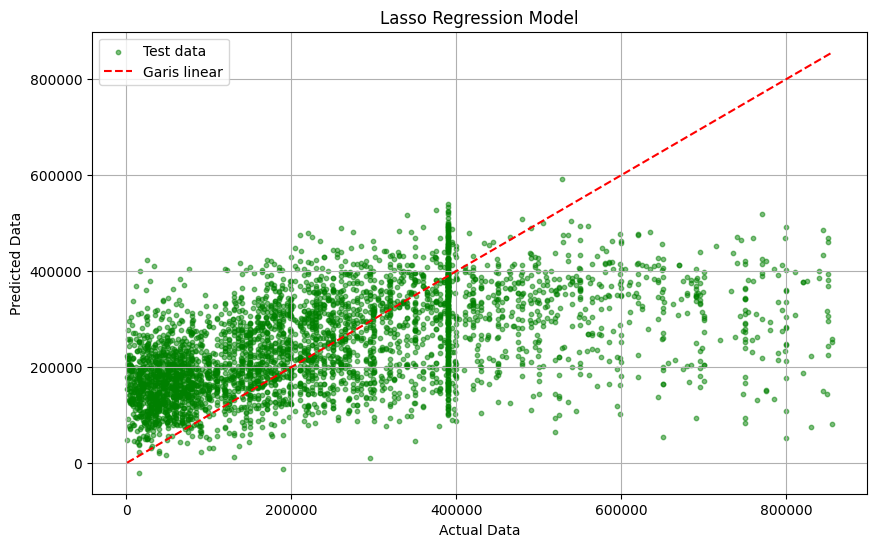

In [103]:
# visualisasi scatterplot untuk mengevaluasi kinerja model regresi dalam memprediksi data

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ls, color='green', label='Test data', alpha=0.5, s=10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Garis linear', linestyle= '--')
plt.title('Lasso Regression Model')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
# evaluasi model
mae_lasso = mean_absolute_error(y_test, y_pred_ls)
mse_lasso = mean_squared_error(y_test, y_pred_ls)
rms_lasso = root_mean_squared_error(y_test, y_pred_ls)
r2_lasso = r2_score(y_test, y_pred_ls)

print('mean absolute error:', mae_lasso)
print('mean squared error:', mse_lasso)
print('root mean squared error:', rms_lasso)
print('r2 score:', r2_lasso)

mean absolute error: 121117.81463163733
mean squared error: 25448056090.997055
root mean squared error: 159524.46862784735
r2 score: 0.27955627847676323


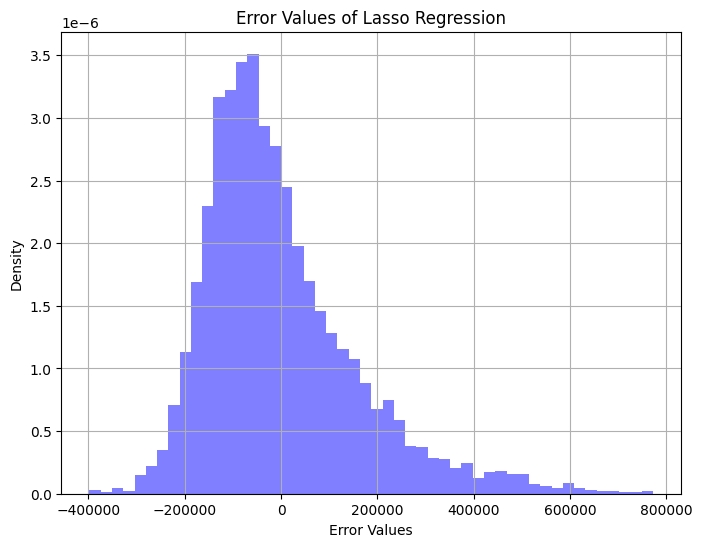

In [105]:
# visualisasi distribusi error antara nilai aktual dan prediksi model
error_values_ls = y_test - y_pred_ls

plt.figure(figsize=(8, 6))
plt.hist(error_values_ls, bins=50, density=True, color='blue', alpha=0.5)
plt.title('Error Values of Lasso Regression')
plt.xlabel('Error Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()